In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

eventos = pd.read_csv("events.csv", low_memory=False)

# Análisis por estado

In [58]:
ventas = eventos.loc[eventos["event"]=="conversion"]
ventas["condition"].value_counts().reset_index()

,index,condition
0,Bom,538
1,Muito Bom,352
2,Excelente,258
3,Bom - Sem Touch ID,22
4,Novo,2


Como se puede observar la cantidad de "Bom - Sem Touch ID" y "Novo" son despreciables con respecto a las demás, por lo que se decidió sacarlas para generar un gráfico más comprensible.

In [59]:
ventas = eventos.loc[eventos["event"]=="conversion"]
ventas = ventas.loc[(ventas["condition"] != "Bom - Sem Touch ID") & (ventas["condition"] != "Novo")]
ventas = ventas["condition"].value_counts().reset_index()
ventas

,index,condition
0,Bom,538
1,Muito Bom,352
2,Excelente,258


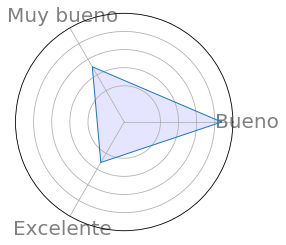

In [83]:
categorias = list(ventas["index"].unique())
cantidades = list(ventas["condition"].unique().flatten())
cantidades += cantidades[:1]
cantidades
N = len(categorias)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
angles

ax = plt.subplot(111, polar=True)
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], ["Bueno", "Muy bueno", "Excelente"], color='grey', size=20,horizontalalignment="center")
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([200,300,400, 500, 600], [], color="grey", size=8)
plt.ylim(0,600)
# Plot data
ax.plot(angles, cantidades, linewidth=1, linestyle='solid')
# Fill area
ax.fill(angles, cantidades, 'b', alpha=0.1)

# Análisis por marca

In [84]:
ventas = eventos.loc[eventos["event"]=="conversion"]
ventas["marca"] = ventas.apply( lambda x: str(x["model"]).split()[0], axis = 1)
ventas["marca"].value_counts().reset_index()

/home/facundo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,index,marca
0,Samsung,641
1,iPhone,323
2,Motorola,149
3,Sony,23
4,LG,20
5,Lenovo,14
6,Asus,2


Como las marcas Sony, LG, Lenovo y Asus son despreciables con respecto a las primeras tres, se decide juntar y crear la categoría "otros" para que las contenga.

In [85]:
categorias = ["Samsung", "iPhone", "Motorola", "Sony", "Otros"]
N = len(categorias)
cantidades = [641, 323, 149, 59, 641]
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
angles

[0.0,
 1.2566370614359172,
 2.5132741228718345,
 3.7699111843077517,
 5.026548245743669,
 0.0]

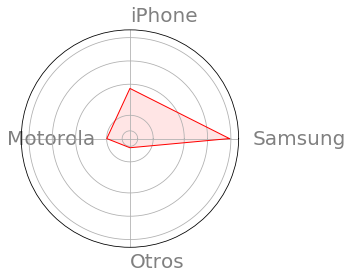

In [97]:
categorias = ["Samsung", "iPhone", "Motorola", "Otros"]
N = len(categorias)
cantidades = [641, 323, 149, 59, 641]
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
angles

ax = plt.subplot(111, polar=True)
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categorias, color='grey', size=20,horizontalalignment="left")
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([50,150,350, 500, 650],[], color="grey", size=8)
plt.ylim(0,700)
# Plot data
ax.plot(angles, cantidades, 'red', linewidth=1, linestyle='solid')
# Fill area"Sony", 
ax.fill(angles, cantidades, 'red', alpha=0.1)

# Análisis por color

In [103]:
ventas = eventos.loc[eventos["event"]=="conversion"]
ventas["color"].value_counts()

Preto              368
Dourado            269
Branco             216
Cinza espacial      89
Prateado            51
Ouro Rosa           32
Rosa                30
Cinza               23
Azul                22
Preto Vermelho      11
Prata                8
Platinum             7
Preto Matte          6
Branco Vermelho      6
Verde                5
Ametista             4
Ouro                 4
Titânio              4
Preto Brilhante      3
Indigo               3
Vermelho             2
Amarelo              2
Cabernet             2
Bambu                2
Azul Topázio         1
Preto Azul           1
Couro Vintage        1
Name: color, dtype: int64

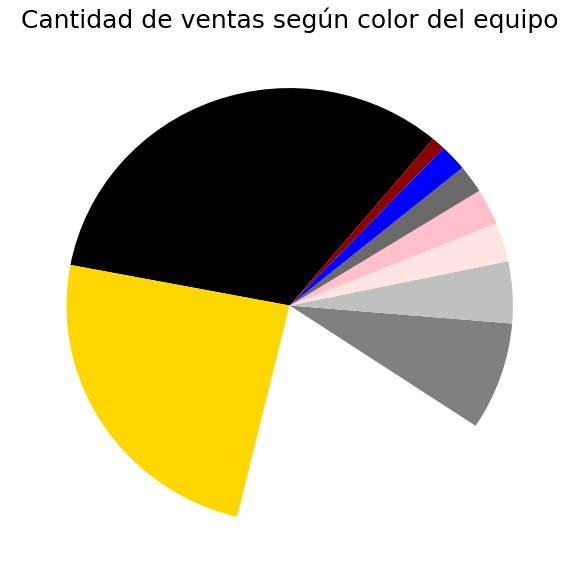

In [130]:
plt.figure(figsize=(10, 10))
plt.title('Cantidad de ventas según color del equipo', fontsize=25)
plt.pie([368, 269, 216, 89, 51, 32, 30, 23, 22, 11], startangle=50, colors=['black', 'gold', 'white', 'grey','silver', 'mistyrose', 'pink', 'dimgrey', 'blue', 'darkred'])
plt.show()